# <center>Assignment 2: Convolutional Neural Network</center>
**<center>Deep Learning | Spring 2022 | Shahid Beheshti University</center>**


Welcome to the **second** programming assignment of the Deep Learning course. 

---

<b>overview</b>:

The goal of this assignment is to get you familiarized with convolutional neural networks. 

First, we will train a CNN model as our base model to solve the Image Colorization task. In general, Image Colorization is a difficult problem e.g. a grayscale image, may have several valid coloring images.

After training, we will add some configurations to it to check their effect and then analyze it.



---
<b>Submission tips</b>:

please review the notes of **this notebook** and whatever is in the **assignment file**.

You can implement other than functions that exist in PY files or change the structure of the notebook based on the given Questions.



<b> What these codes do (exist in PY files)</b>:

There are four PY files that are required to run the CNN.ipynb. Below, the functionality of each PY file are summarized, but more details are provided in the files themselves.

- utils.py: Contain several functions for data preprocessing.
- torch_helper.py: Contain several functions used during the training process. `some of them required to implement`
- model.py: Contains several classes as the models and their blocks (base model and custom U-Net). `required to implement`
- train.py: as the its name show it is for training and validating model. `required to implement`


----
<b>Due date:</b> 10 Ordibehesht 1401 - 11:59 pm
 

 > **_NOTE:_** Alongside the `CNN.ipynb` notebook, there are some python files with the coding parts you need to implement are denoted by: ``` # YOUR CODE #```. Moreover, some <u>Questions</u> are given in the assignment file. 
 
 
 ---


<p style="color:red;">! Probably you need GPU to train your model so you may use your graphic of your system or if you are on Colab don't forget to enable that:</p>
<b><blockquote>Runtime -> Change runtime type -> Hardware Accelator: GPU</blockquote>


# Packages and modules

Let's first import all the packages that you will need during this assignment.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd drive/MyDrive/project-2

/content/drive/MyDrive/project-2


In [ ]:
!ls

 car_colours_kmeans24.npy	     images	   README.md	     utils.py
 CNN.ipynb			     model.py	   report.docx
 data				     outputs	   torch_helper.py
'DL HW2 - Project Description.pdf'   __pycache__   train.py


In [ ]:
# Pytorch library and other packages

import torch
from utils import *
from train import *
import numpy as np

# Constants

In [ ]:
colours_dic_addr = 'car_colours_kmeans24.npy'
your_student_id = 97243081

# other constants if needed

# Dataset


## Prepare Dataset: cifar10

**CIFAR-10** is considered for this assignment which consists of images of size 32x32 pixels. For simplicity, one category of this dataset is considered (automobile).
The input and output of the network will be the grayscale image and RGB image respectively. by **running** the following code blocks get the dataset.

The subset of **24 colors** that are selected to colorize the grayscale images is provided in the car_colours_kmeans24.npy file.

In [ ]:
# Download CIFAR dataset
(x_train, y_train), (x_test, y_test) = load_cifar10()

# LOAD THE COLOURS CATEGORIES
colours = np.load(colours_dic_addr, allow_pickle=True, encoding='bytes')

File path: data/cifar-10-batches-py.tar.gz


# Image Colorization 

## Base Model

Complete the <code>model.py</code> to train your model

<br>

<p align="center">
  <img src="images/baseModel.png">
</p>

### Training

Transforming data...
Epoch [1/25], Val Loss: 2.6063, Val Acc: 17.9%, Time(s): 21.37
Epoch [2/25], Val Loss: 2.0421, Val Acc: 32.7%, Time(s): 41.16
Epoch [3/25], Val Loss: 1.8898, Val Acc: 36.3%, Time(s): 61.77
Epoch [4/25], Val Loss: 1.8176, Val Acc: 37.8%, Time(s): 81.60
Epoch [5/25], Val Loss: 1.7732, Val Acc: 38.9%, Time(s): 101.50
Epoch [6/25], Val Loss: 1.7367, Val Acc: 39.9%, Time(s): 121.20
Epoch [7/25], Val Loss: 1.7068, Val Acc: 40.7%, Time(s): 140.91
Epoch [8/25], Val Loss: 1.6839, Val Acc: 41.4%, Time(s): 160.54
Epoch [9/25], Val Loss: 1.6670, Val Acc: 41.7%, Time(s): 180.41
Epoch [10/25], Val Loss: 1.6512, Val Acc: 42.1%, Time(s): 200.20
Epoch [11/25], Val Loss: 1.6378, Val Acc: 42.5%, Time(s): 219.99
Epoch [12/25], Val Loss: 1.6267, Val Acc: 42.8%, Time(s): 239.80
Epoch [13/25], Val Loss: 1.6181, Val Acc: 42.9%, Time(s): 259.48
Epoch [14/25], Val Loss: 1.6088, Val Acc: 43.2%, Time(s): 279.16
Epoch [15/25], Val Loss: 1.6025, Val Acc: 43.3%, Time(s): 298.94
Epoch [16/25], Va

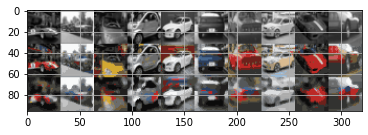

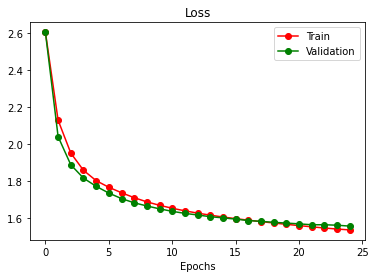

In [ ]:
##############################################################################################
#                                 define some arguments if needed to pass                    #
##############################################################################################

class AttrDict(dict):
    def __init__(self, *args, **kwargs):
        super(AttrDict, self).__init__(*args, **kwargs)
        self.__dict__ = self
args = AttrDict()
args_dict = {
    'gpu': True,
    'seed': your_student_id,
    'category_id': 1,
    'valid': False,
    'checkpoint': "",
    'colours': colours_dic_addr,
    'model': "base",
    'kernel': 3,
    'num_filters': 32,
    'learn_rate': 0.001,
    'batch_size': 200,
    'epochs': 25,
    'seed': 0,
    'plot': True,
    'experiment_name': 'colourization_unet',
    'visualize': False,
    'downsize_input': False,
}
args.update(args_dict)

##############################################################################################
#                                 Call train function                                        #
model = train(args, x_train, y_train, x_test, y_test, colours)
##############################################################################################

## Custom U-Net Model

# Skip connection 

A skip connection in a neural network is a connection which skips one or more layer and connects to a later layer. We will add skip connections to our base model.

We will add skip connection from first layer to last layer, second layer to the second last, etc. This type of skip connection was introduced by [Ronneberger et al.](https://arxiv.org/abs/1505.04597) in U-Net architecture.

The class of this model exists in <code>model.py</code> to complete.

<br>

<p align="center">
  <img src="images/U-Net.png">
</p>

## Training

Transforming data...
Epoch [1/25], Val Loss: 10.4200, Val Acc: 19.3%, Time(s): 35.71
Epoch [2/25], Val Loss: 1.9486, Val Acc: 34.8%, Time(s): 69.72
Epoch [3/25], Val Loss: 1.6527, Val Acc: 43.4%, Time(s): 103.96
Epoch [4/25], Val Loss: 1.6632, Val Acc: 42.5%, Time(s): 138.03
Epoch [5/25], Val Loss: 1.5699, Val Acc: 45.6%, Time(s): 171.96
Epoch [6/25], Val Loss: 1.5534, Val Acc: 45.7%, Time(s): 206.02
Epoch [7/25], Val Loss: 1.5211, Val Acc: 46.9%, Time(s): 240.10
Epoch [8/25], Val Loss: 1.7137, Val Acc: 41.7%, Time(s): 274.28
Epoch [9/25], Val Loss: 1.4695, Val Acc: 48.6%, Time(s): 308.39
Epoch [10/25], Val Loss: 1.5098, Val Acc: 45.9%, Time(s): 342.36
Epoch [11/25], Val Loss: 1.4727, Val Acc: 46.9%, Time(s): 376.74
Epoch [12/25], Val Loss: 1.4884, Val Acc: 46.3%, Time(s): 411.29
Epoch [13/25], Val Loss: 1.5064, Val Acc: 46.3%, Time(s): 445.84
Epoch [14/25], Val Loss: 1.5006, Val Acc: 45.7%, Time(s): 481.02
Epoch [15/25], Val Loss: 1.4358, Val Acc: 47.9%, Time(s): 516.01
Epoch [16/25],

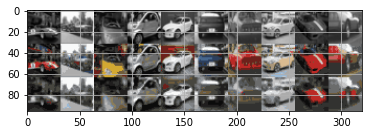

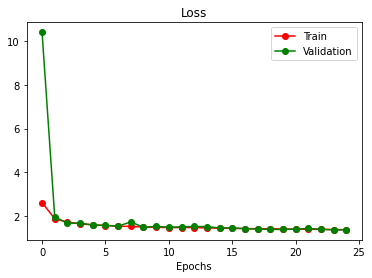

In [ ]:
# ##############################################################################################
# #                                 define some arguments if needed to pass                    #
# ##############################################################################################

class AttrDict(dict):
    def __init__(self, *args, **kwargs):
        super(AttrDict, self).__init__(*args, **kwargs)
        self.__dict__ = self
args = AttrDict()

args_dict = {
              'gpu':True, 
              'valid':False, 
              'category_id': 1,
              'checkpoint':"", 
              'colours':colours_dic_addr, 
              'model':"U-Net", 
              'kernel':3,
              'num_filters':64, 
              'learn_rate':0.1, 
              'batch_size':200, 
              'epochs':25, 
              'seed':0,
              'plot':True, 
              'experiment_name': 'colourization_unet',
              'visualize': False,
              'downsize_input':False,
}
args.update(args_dict)
unet_cnn = train(args, x_train, y_train, x_test, y_test, colours)

# Extra Points: U-Net with Residual block

Based on the concept of Residual Learning, convert DownConv, UpConv and BottelNeck to Residual block.Then modify the `train` function to get result.

<br>
<p align="center">
  <img src="images/ResidualBlock.png">
</p>

## Training

In [ ]:
##############################################################################################
#                                 define some arguments if needed to pass                    #
##############################################################################################

class AttrDict(dict):
    def __init__(self, *args, **kwargs):
        super(AttrDict, self).__init__(*args, **kwargs)
        self.__dict__ = self
args = AttrDict()
# define other arguments if needed during training
args_dict = {
              'gpu':True, 
              'valid':False, 
              'category_id': 1,
              'checkpoint':"", 
              'colours':colours_dic_addr, 
              'model':"Residual_U-Net", 
              'kernel':3,
              'num_filters':64, 
              'learn_rate':0.1, 
              'batch_size':200, 
              'epochs':25, 
              'seed':0,
              'plot':True, 
              'experiment_name': 'colourization_unet',
              'visualize': False,
              'downsize_input':False,
}
args.update(args_dict)

##############################################################################################
#                                 call the train function (train.py)                         #
residual_unet_cnn = train(args, x_train, y_train, x_test, y_test, colours)
##############################################################################################

# Refrences

- https://ai.stanford.edu/~syyeung/cvweb/tutorial1.html
- https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html
- http://papers.nips.cc/paper/7515-how-does-batch-normalization-help-optimization.pdf
- Intro to optimization in deep learning: Busting the myth about batch normalization [[link](https://blog.paperspace.com/busting-the-myths-about-batch-normalization/)]
- Why Does Batch Normalization Work? [[link](https://abay.tech/blog/2018/07/01/why-does-batch-normalization-work/)]
- https://arxiv.org/abs/1505.04597
